<a class="anchor" id="0"></a>
# **FIFA 19 Player Data Visualization**


In this notebook, I will demonstrate data visualizaton techniques using the **FIFA 19 complete player dataset**.

So, let's get started.

# **Table of Contents**

1.	Introduction to FIFA 19 complete player dataset
2.	Import libraries
3.	Read dataset
4.  Data Exploration
5.  Segregation of Indian Players
6.  Data Visualization
7.  Analyse players based on Nationality
8.  Analyse players based on Club
9.  Profiling top players
10. Data Analysis



# **1. Introduction to FIFA 19 complete player dataset**


- The dataset includes lastest edition FIFA 2019 players attributes which are as follows -

  - Age, Nationality, Overall, Potential, Club, Value, Wage, Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Position, Jersey Number, Joined, Loaned From, Contract Valid Until, Height, Weight, LS, ST, RS, LW, LF, CF, RF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB, Crossing, Finishing, Heading, Accuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, and Release Clause.



# **2. Import libraries**

In [4]:
# ignore warnings :
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
plt.style.use('fivethirtyeight')




In [5]:
# adjust figure size
plt.rcParams['figure.figsize'] = (12,8)

# **3. Read dataset**

In [6]:

# import data
df = pd.read_csv('/content/fifa_eda.csv')

# **4. Data Exploration**

- Now, let's begin data exploration to gain insights about our data.

In [7]:
# shape of the data
df.shape

(18207, 18)

- We can see that there are 18207 rows and 89 columns in the dataset.

In [8]:
# preview dataset
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [9]:
# view column names
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Skill Moves', 'Position', 'Joined', 'Contract Valid Until', 'Height',
       'Weight', 'Release Clause'],
      dtype='object')

In [10]:
# view dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

In [11]:
# check for missing values
df.isnull().sum()

,0
ID,0
Name,0
Age,0
Nationality,0
Overall,0
Potential,0
Club,241
Value,252
Wage,0
Preferred Foot,0


- We can see that the dataset contain missing values.

In [12]:
# fill missing values for continuous variables for proper data visualization
df['Weight'].fillna('200lbs', inplace = True)
df['Contract Valid Until'].fillna(2019, inplace = True)
df['Height'].fillna("5'11", inplace = True)
df['Joined'].fillna('Jul 1, 2018', inplace = True)
df['ID'].fillna(8, inplace = True)
df['Position'].fillna('ST', inplace = True)
df['Club'].fillna('No Club', inplace = True)
df['Skill Moves'].fillna(df['Skill Moves'].median(), inplace = True)
df['Preferred Foot'].fillna('Right', inplace = True)
df['International Reputation'].fillna(1, inplace = True)
df['Wage'].fillna('€200K', inplace = True)

In [13]:
df.fillna(0, inplace = True)

# **5. Segregation of Indian Players**

In [14]:
def country(x):
    return df[df['Nationality'] == x].head()


# prepare dataset for Indian players
country('India')

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
8605,190939,S. Chhetri,33,India,67,67,No Club,0.0,0.0,Right,1.0,3.0,LS,2016,2019,5.583333,154.0,4585.060806
10011,223763,S. Jhingan,24,India,65,71,No Club,0.0,0.0,Right,1.0,2.0,RCB,2016,2019,6.166667,163.0,4585.060806
12598,217225,J. Lalpekhlua,27,India,63,64,No Club,0.0,0.0,Right,1.0,2.0,RS,2016,2019,5.750000,165.0,4585.060806
12811,225213,G. Singh Sandhu,26,India,63,68,No Club,0.0,0.0,Right,1.0,1.0,GK,2016,2019,6.333333,198.0,4585.060806
13508,238205,A. Edathodika,31,India,62,62,No Club,0.0,0.0,Left,1.0,2.0,LCB,2016,2019,6.000000,172.0,4585.060806


# **6. Data Visualization**

## **Distribution of preferred foot**


Q. What is the distribution of preferred foot ?

A. The distribution of preferred foot can be obtained as follows -

In [15]:
df['Preferred Foot'].value_counts()

,count
Preferred Foot,
Right,13996
Left,4211


- The above countplot is great but it does not show up the exact number of players on top of the bar. To show the exact numbers we can proceed as follows-

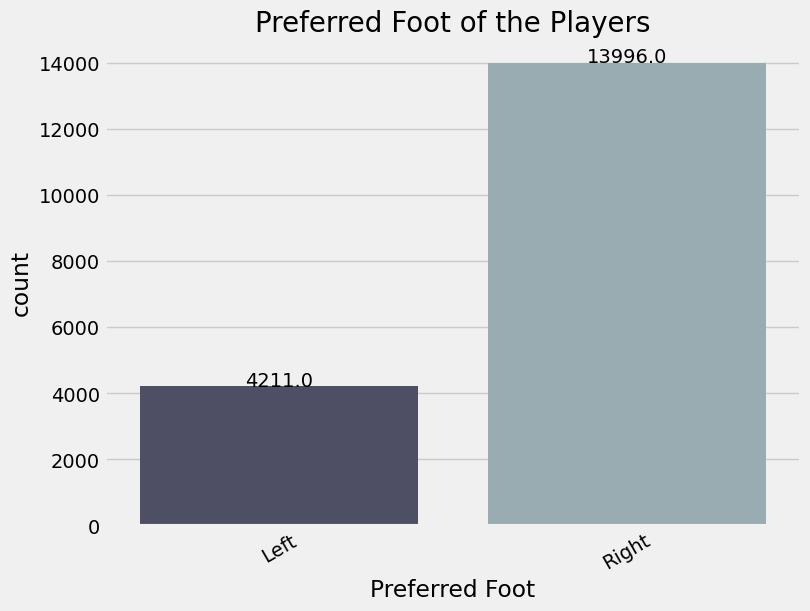

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
graph = sns.countplot(ax=ax,x=df['Preferred Foot'], data=df, palette = 'bone')
graph.set_title('Preferred Foot of the Players', fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

- Now the above countplots are great but they do not show up the exact percentages of players. We can show the exact percentages of players as follows-

In [17]:
df['Preferred Foot'].value_counts()/len(df)

,count
Preferred Foot,
Right,0.768715
Left,0.231285


- We can use a pie chart to visualize the exact percentages.

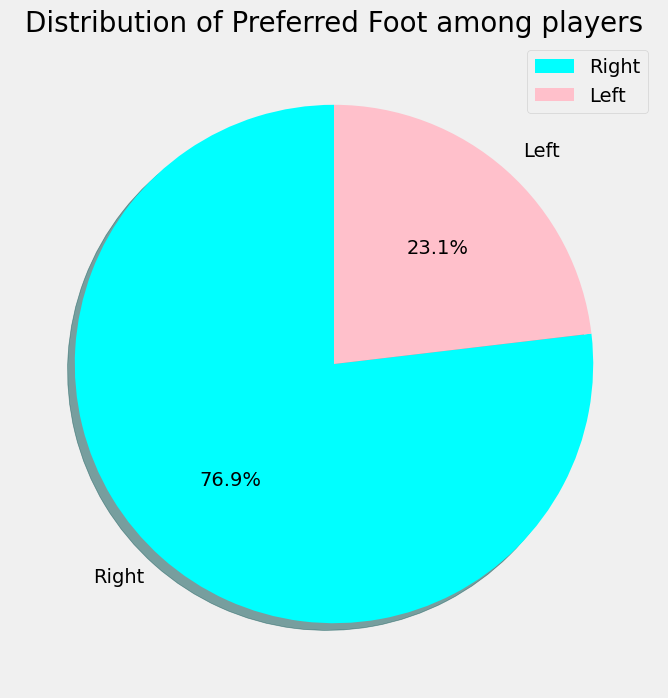

In [18]:
labels = df['Preferred Foot'].value_counts().index
size = df['Preferred Foot'].value_counts()
colors=['cyan','pink']
plt.pie(size, labels = labels, colors = colors, shadow = True, autopct='%1.1f%%',startangle = 90)
plt.title('Distribution of Preferred Foot among players', fontsize = 20)
plt.legend()
plt.show()

## **Age distribution of players**

Q. How can we visualize the age distribution of players.

A. We can use a histogram to visualize the age distribution of players.

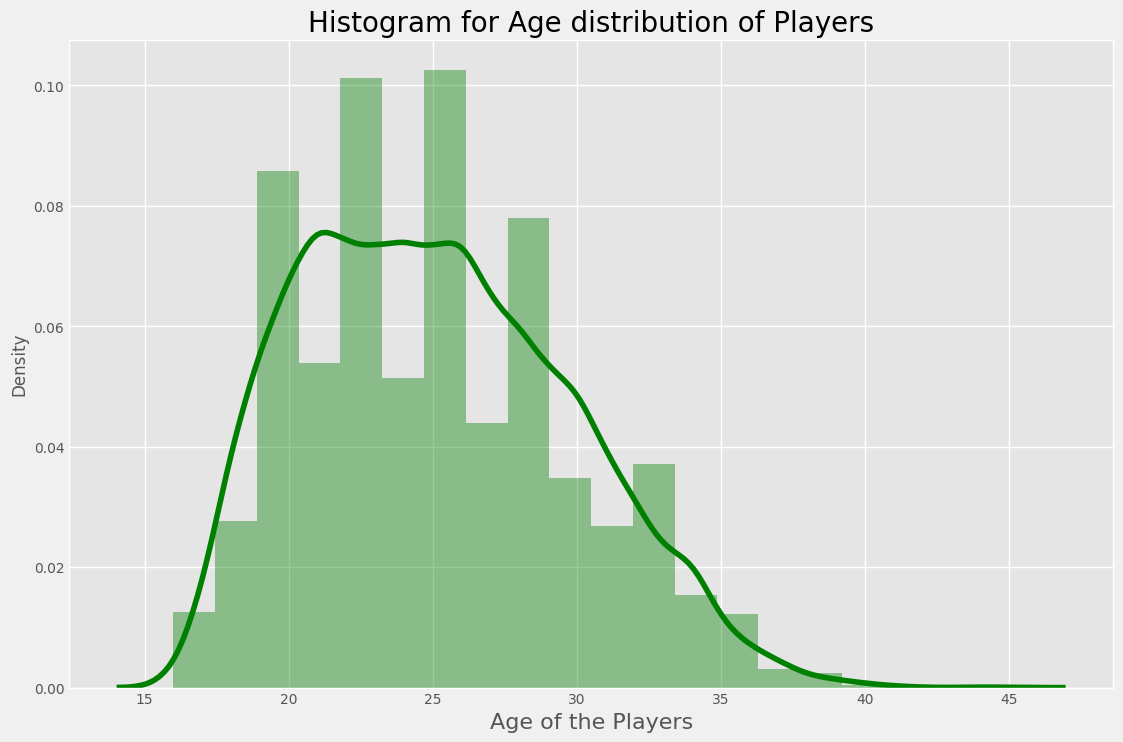

In [19]:
x = df['Age']
plt.figure(figsize = (12, 8))
plt.style.use('ggplot')
ax = sns.distplot(x, bins = 20, kde = True, color='g')
ax.set_xlabel(xlabel = 'Age of the Players', fontsize = 16)
ax.set_title(label = 'Histogram for Age distribution of Players', fontsize = 20)
plt.show()



- Please see [Seaborn Color Palettes](https://seaborn.pydata.org/tutorial/color_palettes.html) for more information on Seaborn Color Palettes.

## **Visualize International Reputation**


Q. How can we track international reputation of players.

A. We can track international reputation of players as follows -

In [20]:
df['International Reputation'].value_counts()

,count
International Reputation,
1.0,16580
2.0,1261
3.0,309
4.0,51
5.0,6


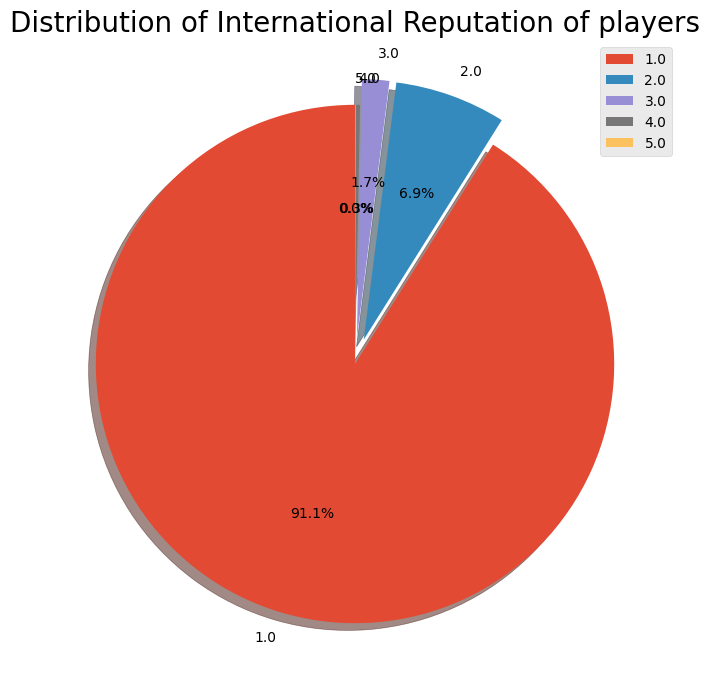

In [21]:
labels = df['International Reputation'].value_counts().index
size = df['International Reputation'].value_counts()
explode = [0, 0.1, 0.1, 0, 0]
plt.pie(size, labels = labels, explode = explode, shadow = True, autopct='%1.1f%%',startangle = 90)
plt.title('Distribution of International Reputation of players', fontsize = 20)
plt.legend()
plt.show()

Q. What is the international reputation of left and right footed players?

A. The international reputation of left and right footed players can be given as follows -

In [22]:
df.groupby('Preferred Foot')['International Reputation'].value_counts()

Preferred Foot  International Reputation
Left            1.0                          3839
                2.0                           290
                3.0                            66
                4.0                            15
                5.0                             1
Right           1.0                         12741
                2.0                           971
                3.0                           243
                4.0                            36
                5.0                             5
Name: count, dtype: int64

## **Skill Moves of the Players**


Q. What is the different skill moves of the players?

A. The different work rate of the players can be given as follows -

In [23]:
df['Skill Moves'].value_counts()

,count
Skill Moves,
2.0,8613
3.0,6600
1.0,2026
4.0,917
5.0,51


- We can visualize the skill moves of the players as follows-

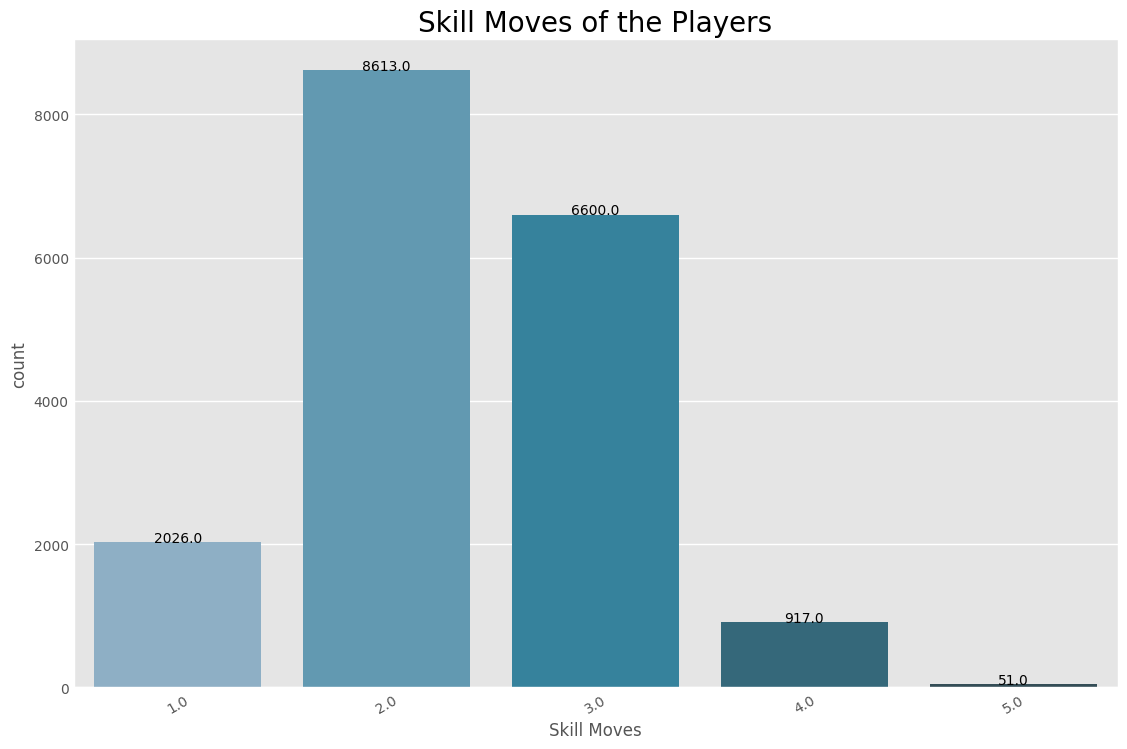

In [24]:
fig, ax = plt.subplots(figsize=(12,8))
graph = sns.countplot(ax=ax,x=df['Skill Moves'], data=df, palette = 'PuBuGn_d')
graph.set_title('Skill Moves of the Players', fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

Q. How can we visualze skill moves of players segregated by preferred foot?

A. We can visualize skill moves of players segregated by preferred foot as follows-

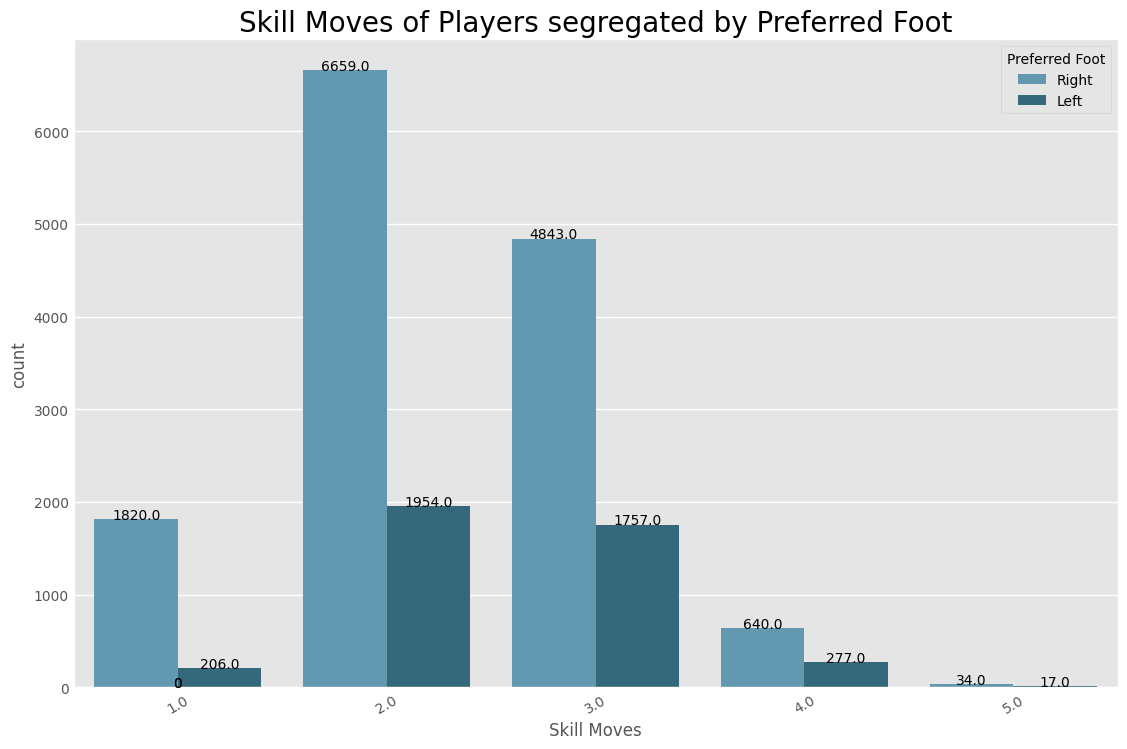

In [25]:
fig, ax = plt.subplots(figsize=(12,8))
graph = sns.countplot(ax=ax,x=df['Skill Moves'], data=df, hue='Preferred Foot', palette = 'PuBuGn_d')
graph.set_title('Skill Moves of Players segregated by Preferred Foot'  , fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

## **Potential Score of the Players**


Q. How can we visualize potential score of the players?

A. The potential score of the players can be visualized with histogram as follows -

## **Overall Score of the Players**


Q. How can we visualize overall score of the players?

A. The overall score of the players can be visualized with histogram as follows -

## **Count of Players with Positions**


Q. What is the number of players at different positions?

A. The number of players at different positions can be found as follows -

In [26]:
df['Position'].value_counts()

,count
Position,
ST,2154
GK,2027
CB,1779
CM,1395
LB,1372
RB,1291
RM,1127
LM,1095
CAM,959


- We can visualize number of players at different positions as follows -

# **7. Analyse players based on nationality**


Q. How do we calculate number of countries?


A. We can calculate number of countries as follows -


In [27]:
df['Nationality'].nunique()

164

Q. Which countries are there in the dataset?

A. The names of countries are as follows -

In [28]:
df['Nationality'].unique()

array(['Argentina', 'Portugal', 'Brazil', 'Spain', 'Belgium', 'Croatia',
       'Uruguay', 'Slovenia', 'Poland', 'Germany', 'France', 'England',
       'Italy', 'Egypt', 'Colombia', 'Denmark', 'Gabon', 'Wales',
       'Senegal', 'Costa Rica', 'Slovakia', 'Netherlands',
       'Bosnia Herzegovina', 'Morocco', 'Serbia', 'Algeria', 'Austria',
       'Greece', 'Chile', 'Sweden', 'Korea Republic', 'Finland', 'Guinea',
       'Montenegro', 'Armenia', 'Switzerland', 'Norway', 'Czech Republic',
       'Scotland', 'Ghana', 'Central African Rep.', 'DR Congo',
       'Ivory Coast', 'Russia', 'Ukraine', 'Iceland', 'Mexico', 'Jamaica',
       'Albania', 'Venezuela', 'Japan', 'Turkey', 'Ecuador', 'Paraguay',
       'Mali', 'Nigeria', 'Cameroon', 'Dominican Republic', 'Israel',
       'Kenya', 'Hungary', 'Republic of Ireland', 'Romania',
       'United States', 'Cape Verde', 'Australia', 'Peru', 'Togo',
       'Syria', 'Zimbabwe', 'Angola', 'Burkina Faso', 'Iran', 'Estonia',
       'Tunisia', 'Equato

Q. Which are top 10 countries with most number of players?

A. The top 10 countries with most number of players are as follows -

In [29]:
top_countries = df['Nationality'].value_counts().head(10)

top_countries

,count
Nationality,
England,1662
Germany,1198
Spain,1072
Argentina,937
France,914
Brazil,827
Italy,702
Colombia,618
Japan,478


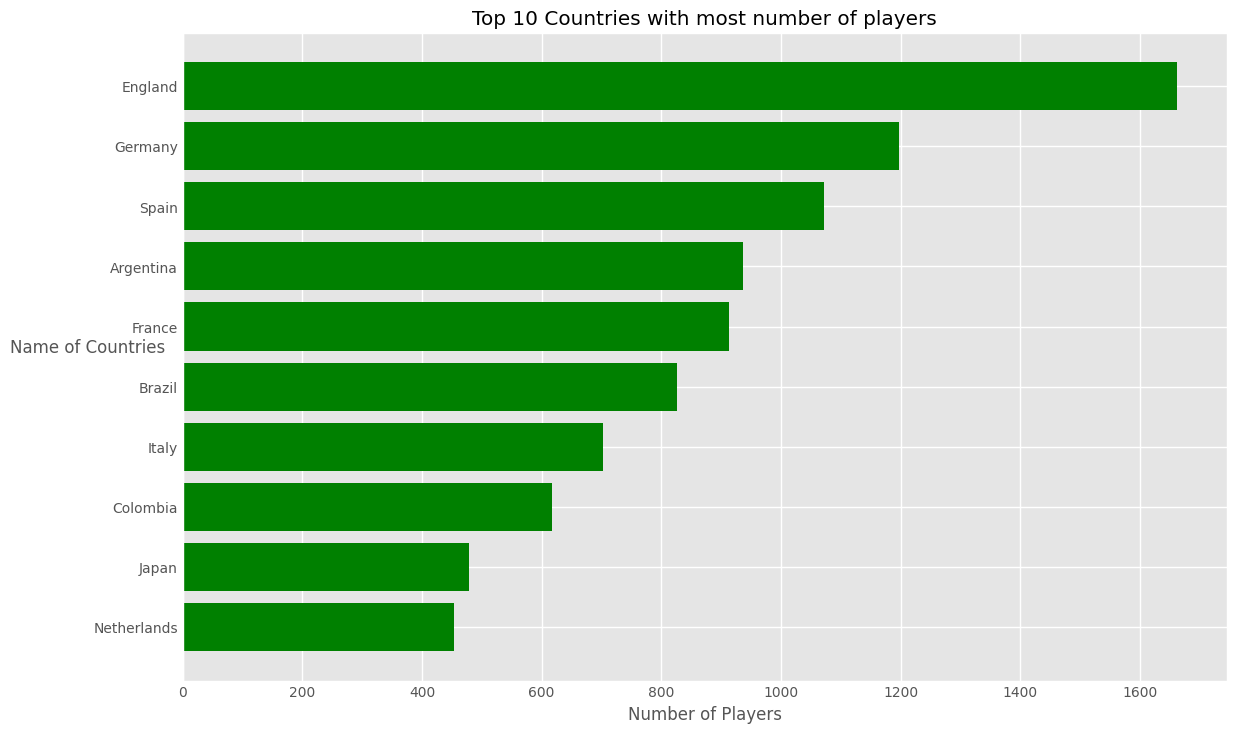

In [30]:
fig, ax = plt.subplots(figsize=(12,8))
x = top_countries.values
y = top_countries.index
ax.barh(y, x, align='center', color='green')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Players')
ax.set_ylabel('Name of Countries', rotation=0)
ax.set_title('Top 10 Countries with most number of players')
plt.show()


In [31]:
top_countries_name = top_countries.index

top_countries_name

Index(['England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy',
       'Colombia', 'Japan', 'Netherlands'],
      dtype='object', name='Nationality')

## **Age distribution from top countries**


Q. What is the age distribution from top countries?

A. We can draw a box plot to check the age distribution from top countries.

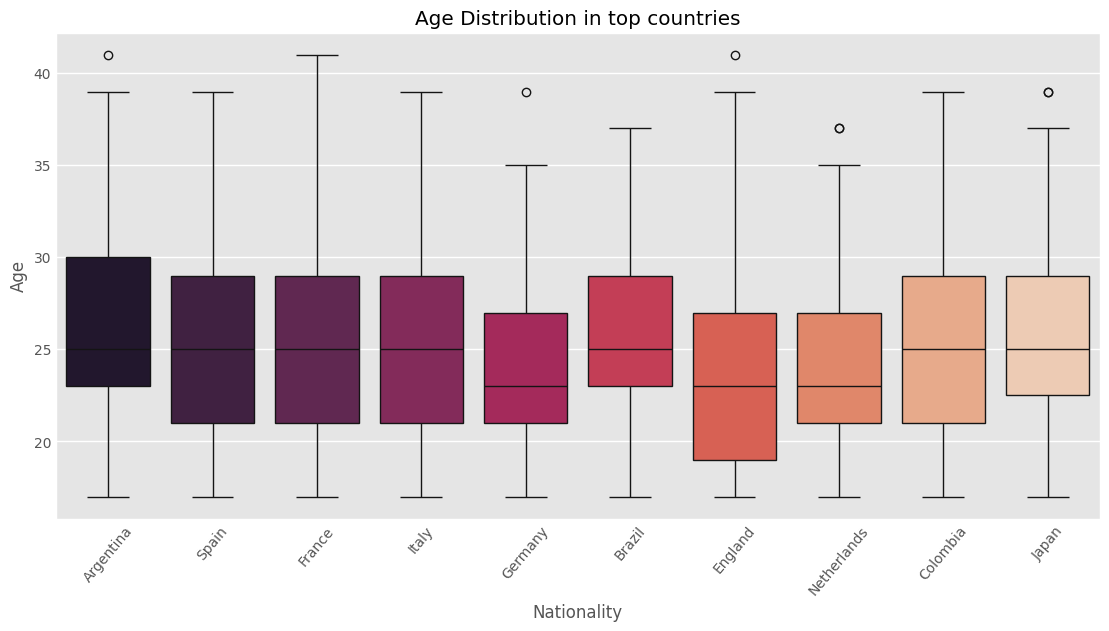

In [32]:
df_country_age = df.loc[df['Nationality'].isin(top_countries_name) & df['Age']]
plt.figure(1 , figsize = (12,6))
sns.boxplot(x = 'Nationality' , y = 'Age' , data = df_country_age, palette='rocket')
plt.title('Age Distribution in top countries')
plt.xticks(rotation = 50)
plt.show()

So, Germany, England and Netherlands have youngest set of players and Argentian and Brazil have eldest set of players.

## **Overall Rating**

Q. What is the distribution of Overall Score of Players from top countries?

A. We can draw a barplot to check the distribution of Overall Score of Players from top countries as follows -

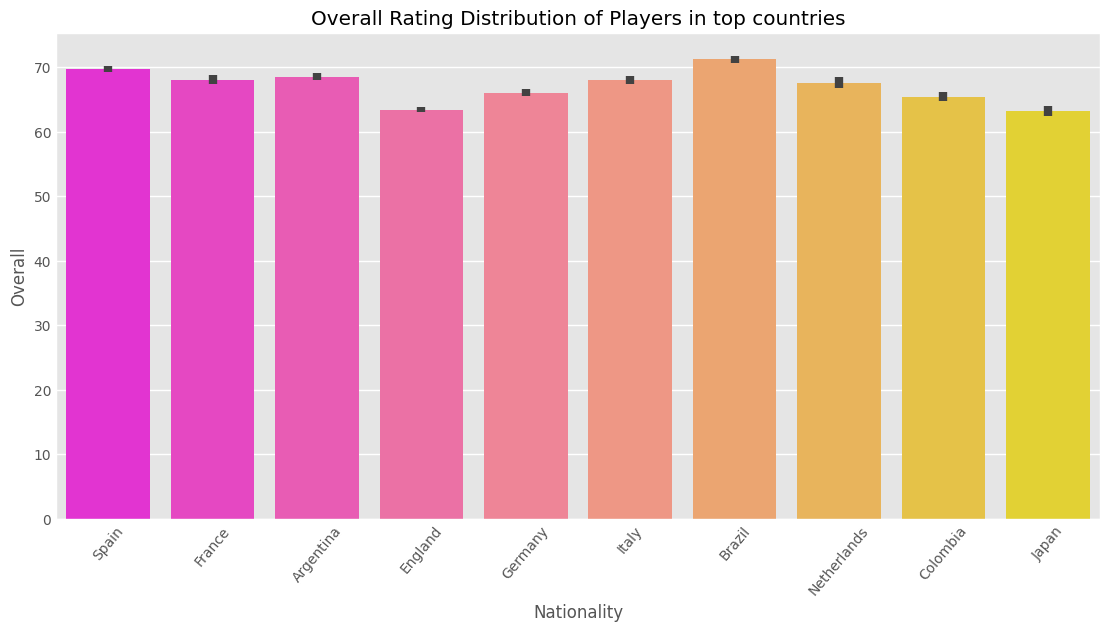

In [33]:
df_country_rating = df.loc[df['Nationality'].isin(top_countries_name) & df['Overall']]
plt.figure(1 , figsize = (12,6))
sns.barplot(x = 'Nationality' , y = 'Overall' , data = df_country_rating, palette='spring')
plt.title('Overall Rating Distribution of Players in top countries')
plt.xticks(rotation = 50)
plt.show()

## **Potential Rating**

Q. What is the distribution of Potential Score of Players from top countries?

A. We can draw a barplot to check the distribution of Potential Score of Players from top countries as follows -

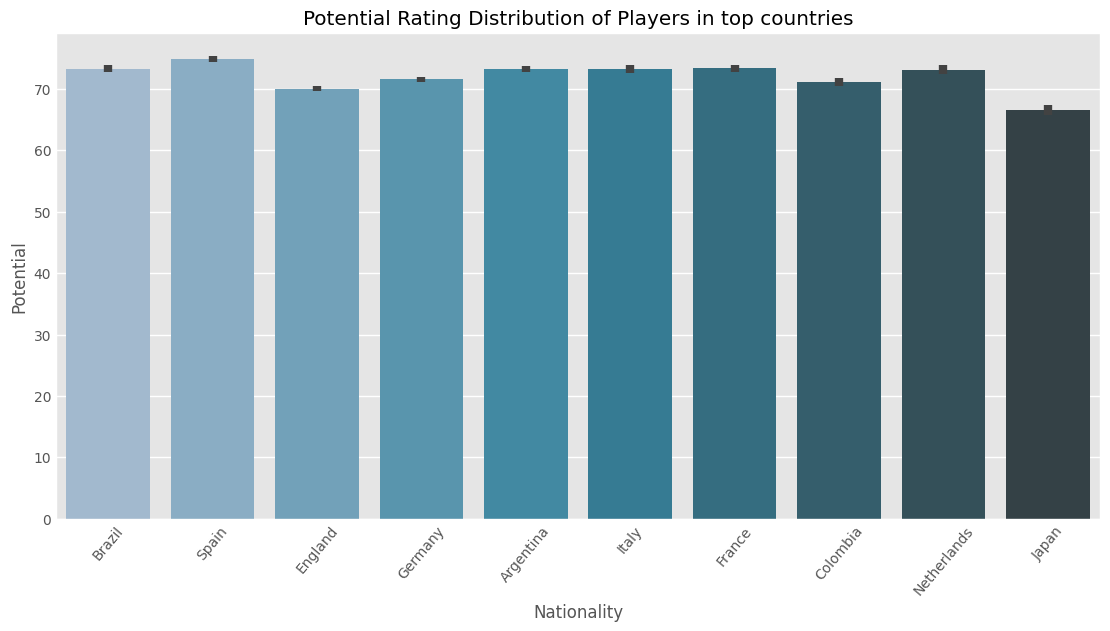

In [34]:
df_country_rating = df.loc[df['Nationality'].isin(top_countries_name) & df['Potential']]
plt.figure(1 , figsize = (12,6))
sns.barplot(x = 'Nationality' , y = 'Potential' , data = df_country_rating, palette='PuBuGn_d')
plt.title('Potential Rating Distribution of Players in top countries')
plt.xticks(rotation = 50)
plt.show()

# **8. Analyse players based on club**

Q. How many clubs are there?

In [35]:
df['Club'].nunique()

652

Q. What are the club names?

In [36]:
df['Club'].unique()

array(['FC Barcelona', 'Juventus', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid',
       'Atlético Madrid', 'FC Bayern München', 'Tottenham Hotspur',
       'Liverpool', 'Napoli', 'Arsenal', 'Milan', 'Inter', 'Lazio',
       'Borussia Dortmund', 'Vissel Kobe', 'Olympique Lyonnais', 'Roma',
       'Valencia CF', 'Guangzhou Evergrande Taobao FC', 'FC Porto',
       'FC Schalke 04', 'Beşiktaş JK', 'LA Galaxy', 'Sporting CP',
       'Real Betis', 'Olympique de Marseille', 'RC Celta',
       'Bayer 04 Leverkusen', 'Real Sociedad', 'Villarreal CF',
       'Sevilla FC', 'SL Benfica', 'AS Saint-Étienne', 'AS Monaco',
       'Leicester City', 'Atalanta', 'Grêmio', 'Atlético Mineiro',
       'RB Leipzig', 'Ajax', 'Dalian YiFang FC', 'Everton',
       'West Ham United', '1. FC Köln', 'TSG 1899 Hoffenheim',
       'Shanghai SIPG FC', 'OGC Nice', 'Al Nassr',
       'Wolverhampton Wanderers', 'Borussia Mönchengladbach',
       'Hertha BSC', 'SV Werder

Q. What are some popular clubs?

In [37]:
clubs = ['FC Barcelona','Real Madrid','Juventus','Liverpool','Manchester United',
         'Chelsea','Arsenal','Paris Saint-Germain' ,'FC Bayern München','Manchester City']

## **Age distribution in famous clubs**

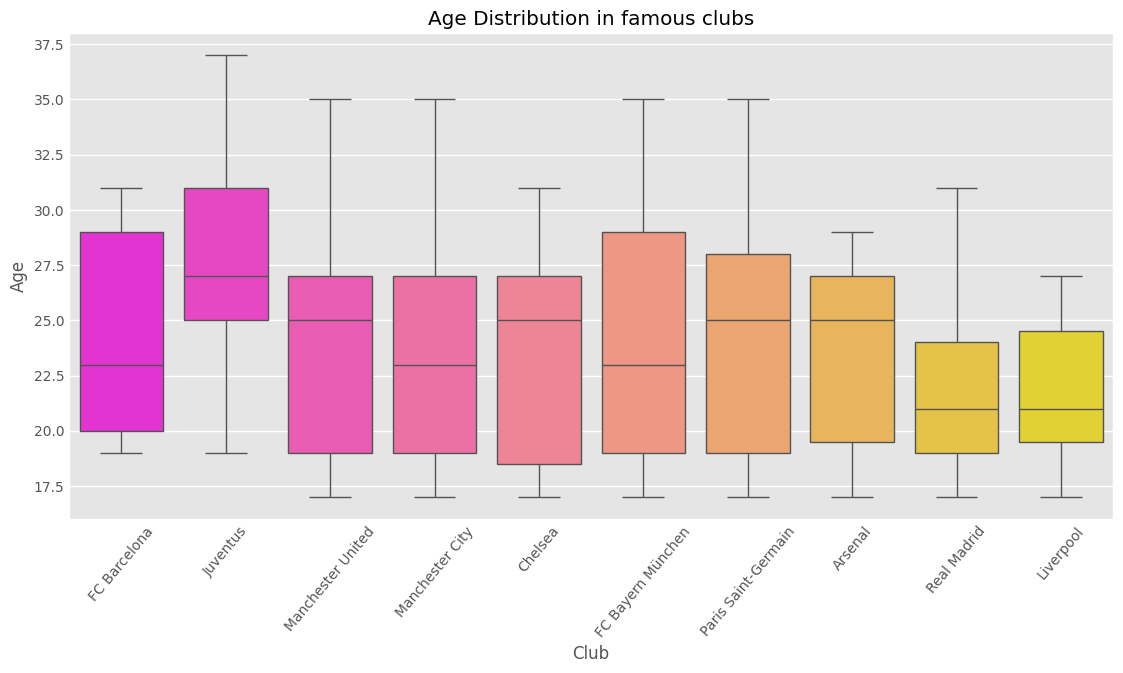

In [38]:
df_club_age = df.loc[df['Club'].isin(clubs) & df['Age']]
plt.figure(1 , figsize = (12,6))
sns.boxplot(x = 'Club', y = 'Age' , data = df_club_age, palette='spring')
plt.title('Age Distribution in famous clubs')
plt.xticks(rotation = 50)
plt.show()

So, Juventus has the eldest set of players and Real Madrid and Liverpool has youngest set of players.

## **Overall Rating in famous clubs**

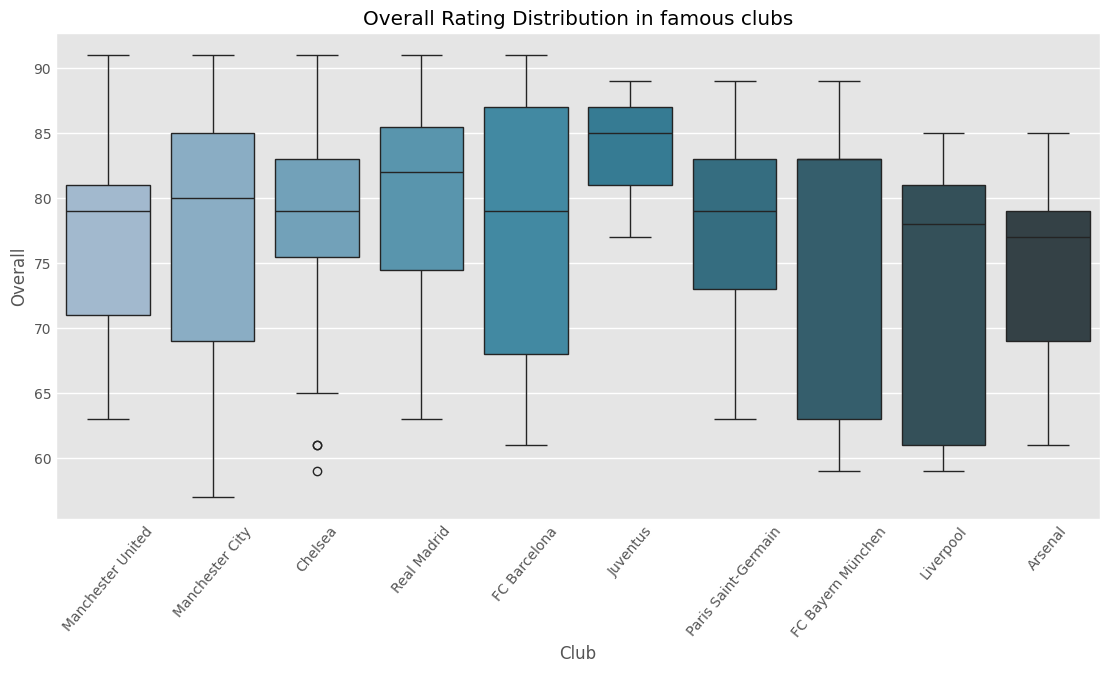

In [39]:
df_club_rating = df.loc[df['Club'].isin(clubs) & df['Overall']]
plt.figure(1 , figsize = (12,6))
sns.boxplot(x = 'Club' , y = 'Overall' , data = df_club_rating, palette='PuBuGn_d')
plt.title('Overall Rating Distribution in famous clubs')
plt.xticks(rotation = 50)
plt.show()

So, Juventus has the best rating of the players.

## **The Best Clubs with Players Overall Rating**

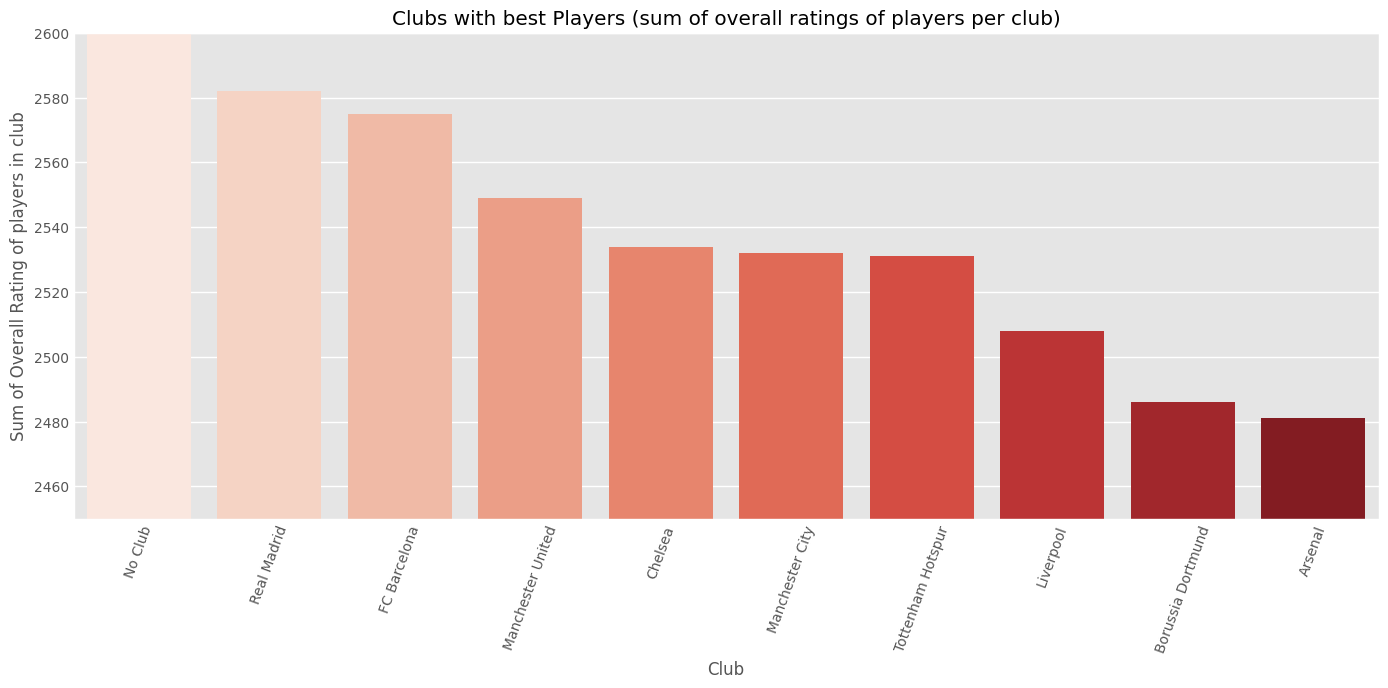

In [40]:
best_dict = {}
for club in df['Club'].unique():
    overall_rating = df['Overall'][df['Club'] == club].sum()
    best_dict[club] = overall_rating
best_club = pd.DataFrame.from_dict(best_dict, orient='index', columns = ['overall'])
best_club['club'] = best_club.index
best_club = best_club.sort_values(by = 'overall', ascending =  False)

plt.figure(1 , figsize = (15 , 6))
sns.barplot(x ='club',y ='overall',data = best_club.head(10),palette='Reds')
plt.xticks(rotation = 70)
plt.xlabel("Club")
plt.ylabel('Sum of Overall Rating of players in club')
plt.title('Clubs with best Players (sum of overall ratings of players per club)')
plt.ylim(2450 , 2600)
plt.show()

# **9. Profiling top players**

## **The Best Players**


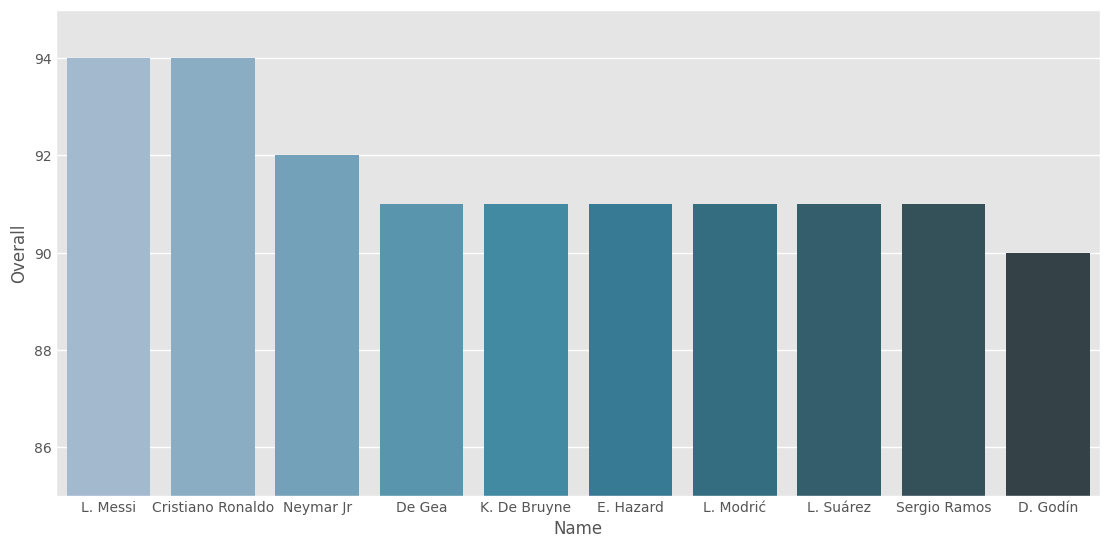

In [41]:
df_best_players = pd.DataFrame.copy(df.sort_values(by ='Overall',ascending = False ).head(10))
plt.figure(1,figsize = (12,6))
sns.barplot(x ='Name' , y = 'Overall' , data = df_best_players, palette='PuBuGn_d')
plt.ylim(85,95)
plt.show()

## **The Highest Earners**




<ipython-input-8-1bbab4e8bcbd>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Wage', data=df_money, palette='PuBuGn_d')


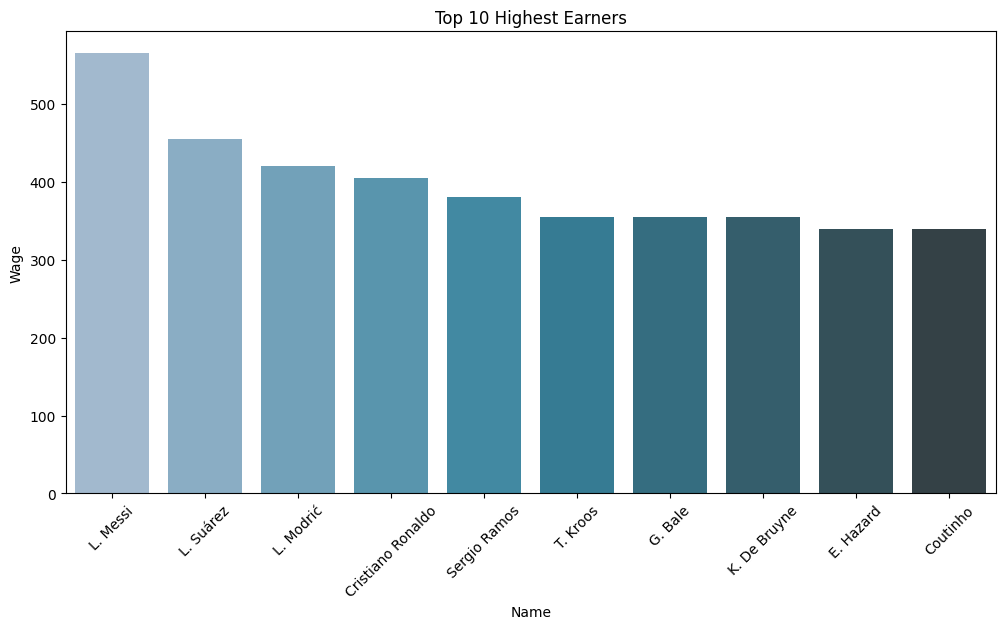

In [8]:
import pandas as pd  # For data manipulation
import seaborn as sns  # For visualization
import matplotlib.pyplot as plt  # For plotting

df = pd.read_csv('/content/fifa_eda.csv')

df_money = df.sort_values(by='Wage', ascending=False).head(10)


plt.figure(figsize=(12,6))
sns.barplot(x='Name', y='Wage', data=df_money, palette='PuBuGn_d')
plt.title('Top 10 Highest Earners')
plt.xticks(rotation=45)  # Rotate the names on the x-axis for better readability
plt.show()


# **10. Data Analysis**

- In this section, we will answer few common questions.

### **The Eldest Players**





<ipython-input-24-ba0e5300b649>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Age', data=df_money, palette='PuBuGn_d')


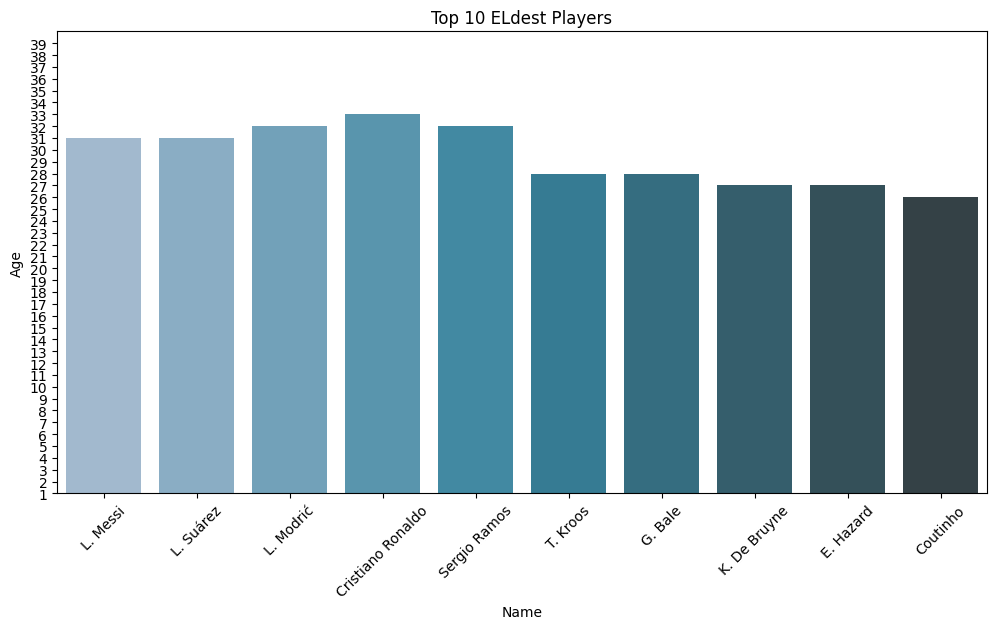

In [24]:
import pandas as pd  # For data manipulation
import seaborn as sns  # For visualization
import matplotlib.pyplot as plt  # For plotting

df = pd.read_csv('/content/fifa_eda.csv')

df_age = df.sort_values(by='Age', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='Name', y='Age', data=df_money, palette='PuBuGn_d')
plt.ylim(1, 40)
plt.yticks(range(1, 40, 1))
plt.title('Top 10 ELdest Players')
plt.xticks(rotation=45)  # Rotate the names on the x-axis for better readability
plt.show()



### **The Youngest Players**




In [10]:
df.sort_values(by = 'Age' , ascending = True)[['Name','Club','Nationality','Overall', 'Age' ]].head()

,Name,Club,Nationality,Overall,Age
18206,G. Nugent,Tranmere Rovers,England,46,16
17743,J. Olstad,Sarpsborg 08 FF,Norway,52,16
13293,H. Massengo,AS Monaco,France,62,16
16081,J. Italiano,Perth Glory,Australia,58,16
18166,N. Ayéva,Örebro SK,Sweden,48,16


<ipython-input-25-106910d31a4a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Age', data=df_youngest, palette='BuGn_r')


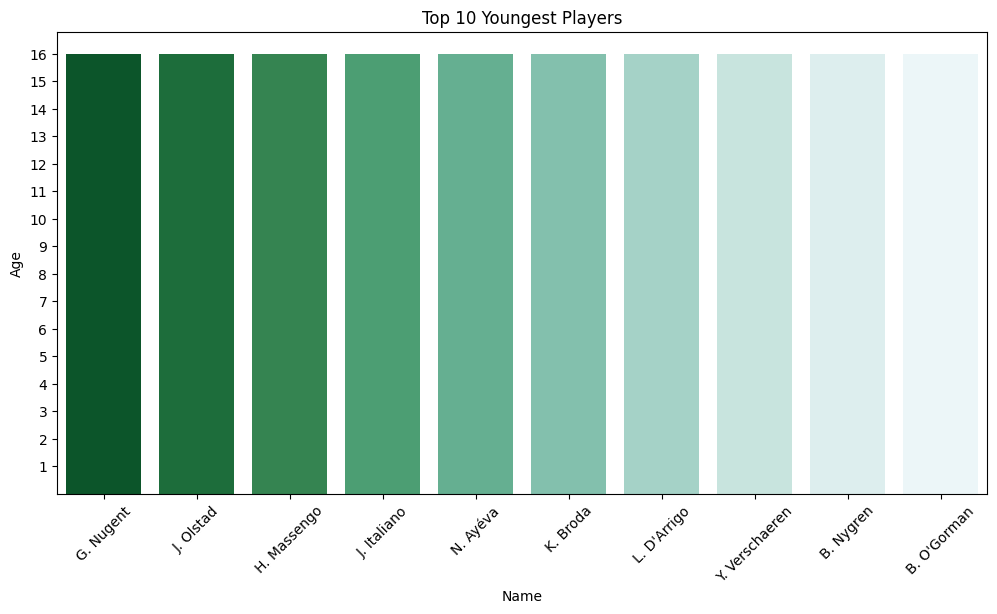

In [25]:
import pandas as pd  # For data manipulation
import seaborn as sns  # For visualization
import matplotlib.pyplot as plt  # For plotting

df = pd.read_csv('/content/fifa_eda.csv')
df_youngest = df.sort_values(by='Age').head(10)

plt.figure(figsize=(12,6))
plt.yticks(range(1, 25, 1))
sns.barplot(x='Name', y='Age', data=df_youngest, palette='BuGn_r')
plt.title('Top 10 Youngest Players')
plt.xticks(rotation=45)
plt.show()